In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind, shapiro, levene,f_oneway,skew,kurtosis,pearsonr, spearmanr,chi2_contingency
import matplotlib.pyplot as plt

**Problem Statement**

Yulu, India’s leading micro-mobility service provider, offers electric cycles to address urban traffic congestion and promote sustainable commuting. Despite its widespread presence in key transit and commercial hubs, Yulu has recently experienced a significant decline in revenue.

To investigate the root causes, Yulu has partnered with a consulting firm to analyze historical rental data and understand the factors influencing the demand for shared electric cycles in the Indian market. The objective is to identify patterns in user behavior and environmental conditions that affect rental volumes, enabling data-driven business decisions to boost revenue and user engagement.

Specifically, the analysis aims to:

    Identify which features (such as temperature, humidity, day of the week, season, holidays, and weather conditions) are significant in predicting the demand for shared electric cycles.

    Understand how user segments (casual vs. registered users) behave differently across various contexts (e.g., holidays, working days, seasons).

    Determine whether external factors like weather or seasonal trends have a statistically significant impact on rental counts.

    Explore the interactions between time-related factors (hour, day, month) and demand levels to identify peak usage patterns.

    Generate actionable recommendations based on insights from exploratory data analysis (EDA) and hypothesis testing to help Yulu tailor its operations and improve revenue.


In [ ]:
df=pd.read_csv('bike_sharing.csv')

In [ ]:
#Observation:
#The dataset includes 13 columns capturing datetime, seasonal & weather conditions, user type (casual/registered), and bike rental counts.
#Temporal information is provided via the datetime column, while variables like temp, humidity, and windspeed reflect environmental conditions.
#casual, registered, and count represent usage metrics; count is the sum of casual and registered users.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Obsevation:
#The dataset contains 10,886 rows and 12 columns, indicating a substantial amount of hourly data likely spanning over two years (2011/2012).
df.shape

(10886, 12)

In [ ]:
#Obsevation:
#There are no missing values in the dataset. All columns are complete and ready for analysis.
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
#Observation:
#Temperature (temp) ranges from 0.82°C to 41°C with a mean around 20.2°C.
#Humidity varies widely, with values from 0% to 100%, averaging ~62%.
#Wind speed ranges from 0 to 57 units(approx), with a low average (~13).
#Rental counts (casual, registered, count) show high variance, with max counts up to 886 (registered) and total counts up to 977.

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Observation:
#No duplicated rows were found in the dataset, ensuring data uniqueness for analysis.
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
#Observation:
# Data types include integers for categorical/numeric features (which needs to be converted to categorical datatype),
#floats for continuous variables like temperature and windspeed, and object for datetime which needs to be converted to datetime format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Observation:
#The categorical columns of season, holiday, workingday and weather has been converted to categories and datetime column to datetime format
df['season']=df['season'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weather']=df['weather'].astype('category')
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
#Observation:
#Categorical variables such as season, holiday, workingday, and weather have 2 to 4 distinct categories as expected.
#Continuous variables like temperature, apparent temperature, humidity, and windspeed have a moderate range of unique
#values, reflecting environmental variation. User counts (casual, registered, and total count) show a wide range of values,
#indicating diverse user activity levels across different hours and conditions.

for cols in df.columns:
  print(f"Unique values in {cols}:{df[cols].nunique()}")

Unique values in datetime:10886
Unique values in season:4
Unique values in holiday:2
Unique values in workingday:2
Unique values in weather:4
Unique values in temp:49
Unique values in atemp:60
Unique values in humidity:89
Unique values in windspeed:28
Unique values in casual:309
Unique values in registered:731
Unique values in count:822


In [ ]:
#Observation:
#New time-related features—hour, day, month, year, and weekday—were created
#from the datetime column to enable more granular temporal analysis of rental patterns.
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year
df['weekday']=df['datetime'].dt.weekday

In [ ]:
#Observation:
# The DataFrame now includes additional columns — hour, day, month, year, and weekday —
# derived from the datetime feature, allowing detailed temporal analysis.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,5


In [ ]:
#Observation:
# The dataset has a fairly balanced distribution of records across the four seasons,
# with each season contributing roughly a quarter of the data.
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
#Observation:
# The low number of holidays relative to working days aligns with typical calendar distributions,
df['holiday'].value_counts()

,count
holiday,
0,10575
1,311


In [ ]:
#Observation:
# The dataset has more working days (7,412) than non-working days (3,474), which is consistent with a typical week structure
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


**Visual Analysis**
Univariate Continuous

**Observation**

**temp:** Shows a near-normal distribution with most temperatures clustered in a moderate range.

**atemp:** Closely mirrors temp’s distribution, as expected, also near-normal.

**humidity:** Approximately normal, with an average around 60%, indicating generally moderate humidity levels.

**windspeed:** Right-skewed, dominated by many low or zero wind speed observations.

**casual:** Highly right-skewed, with many hours recording few or no casual rentals.

**registered:** Right-skewed, indicating registered users’ rentals are concentrated during specific hours.

**count:** Right-skewed overall, driven largely by registered user rental patterns.

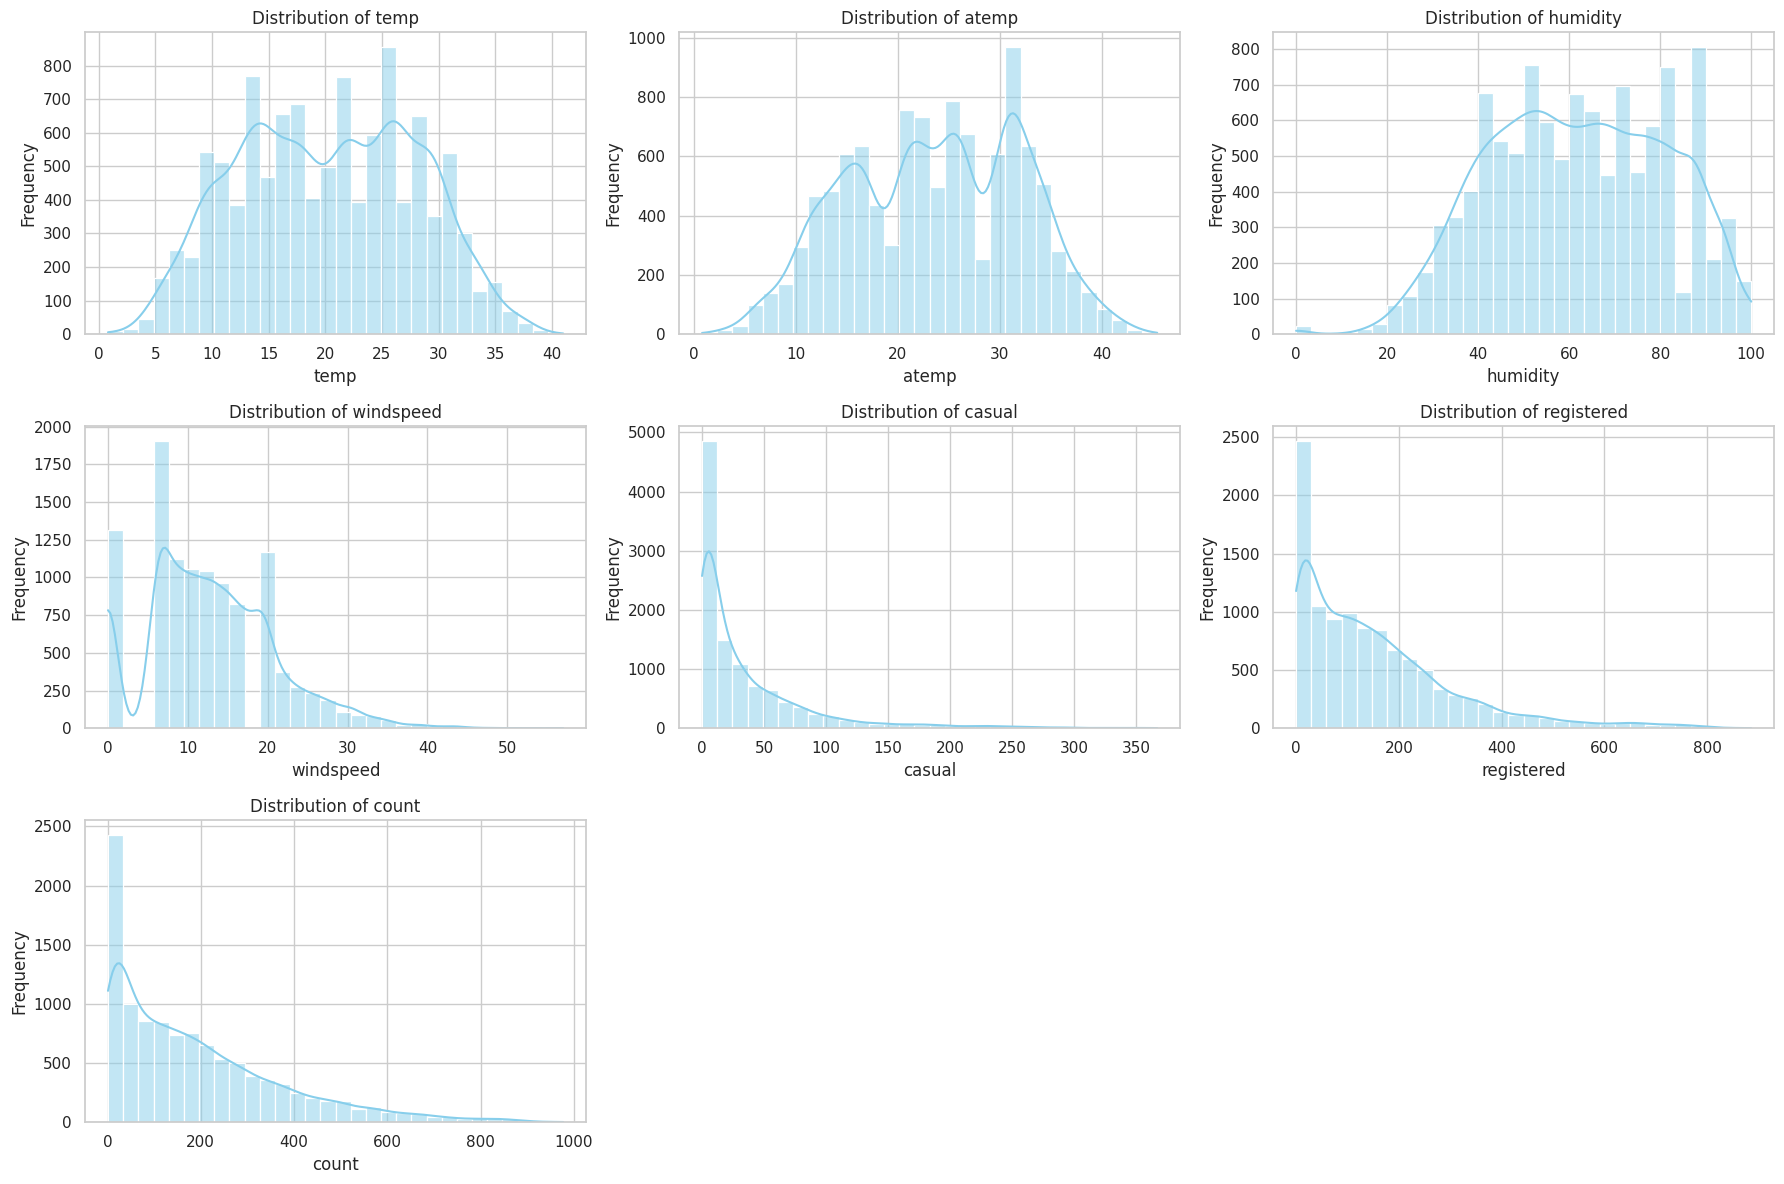

In [ ]:
sns.set(style='whitegrid')
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(18, 12))
for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Visual Analysis** :
Univariate Categorical

**season:** All four seasons have roughly equal number of records — dataset is balanced across seasons.

**holiday:** Majority of records are non-holidays (0), which is expected.

**workingday:** More working days (1) than non-working days; aligns with calendar distribution.

**weather:** Clear weather (1) dominates; as weather becomes worse (2 → 4), record count drops.

**hour:** Early morning hours (2–4 AM) have noticeably fewer records — consistent with lower activity.

**weekday:** All weekdays are represented relatively evenly — no missing days.

**day (from datetime):** Only includes 1st to 19th of each month — could be intentional or due to sampling.

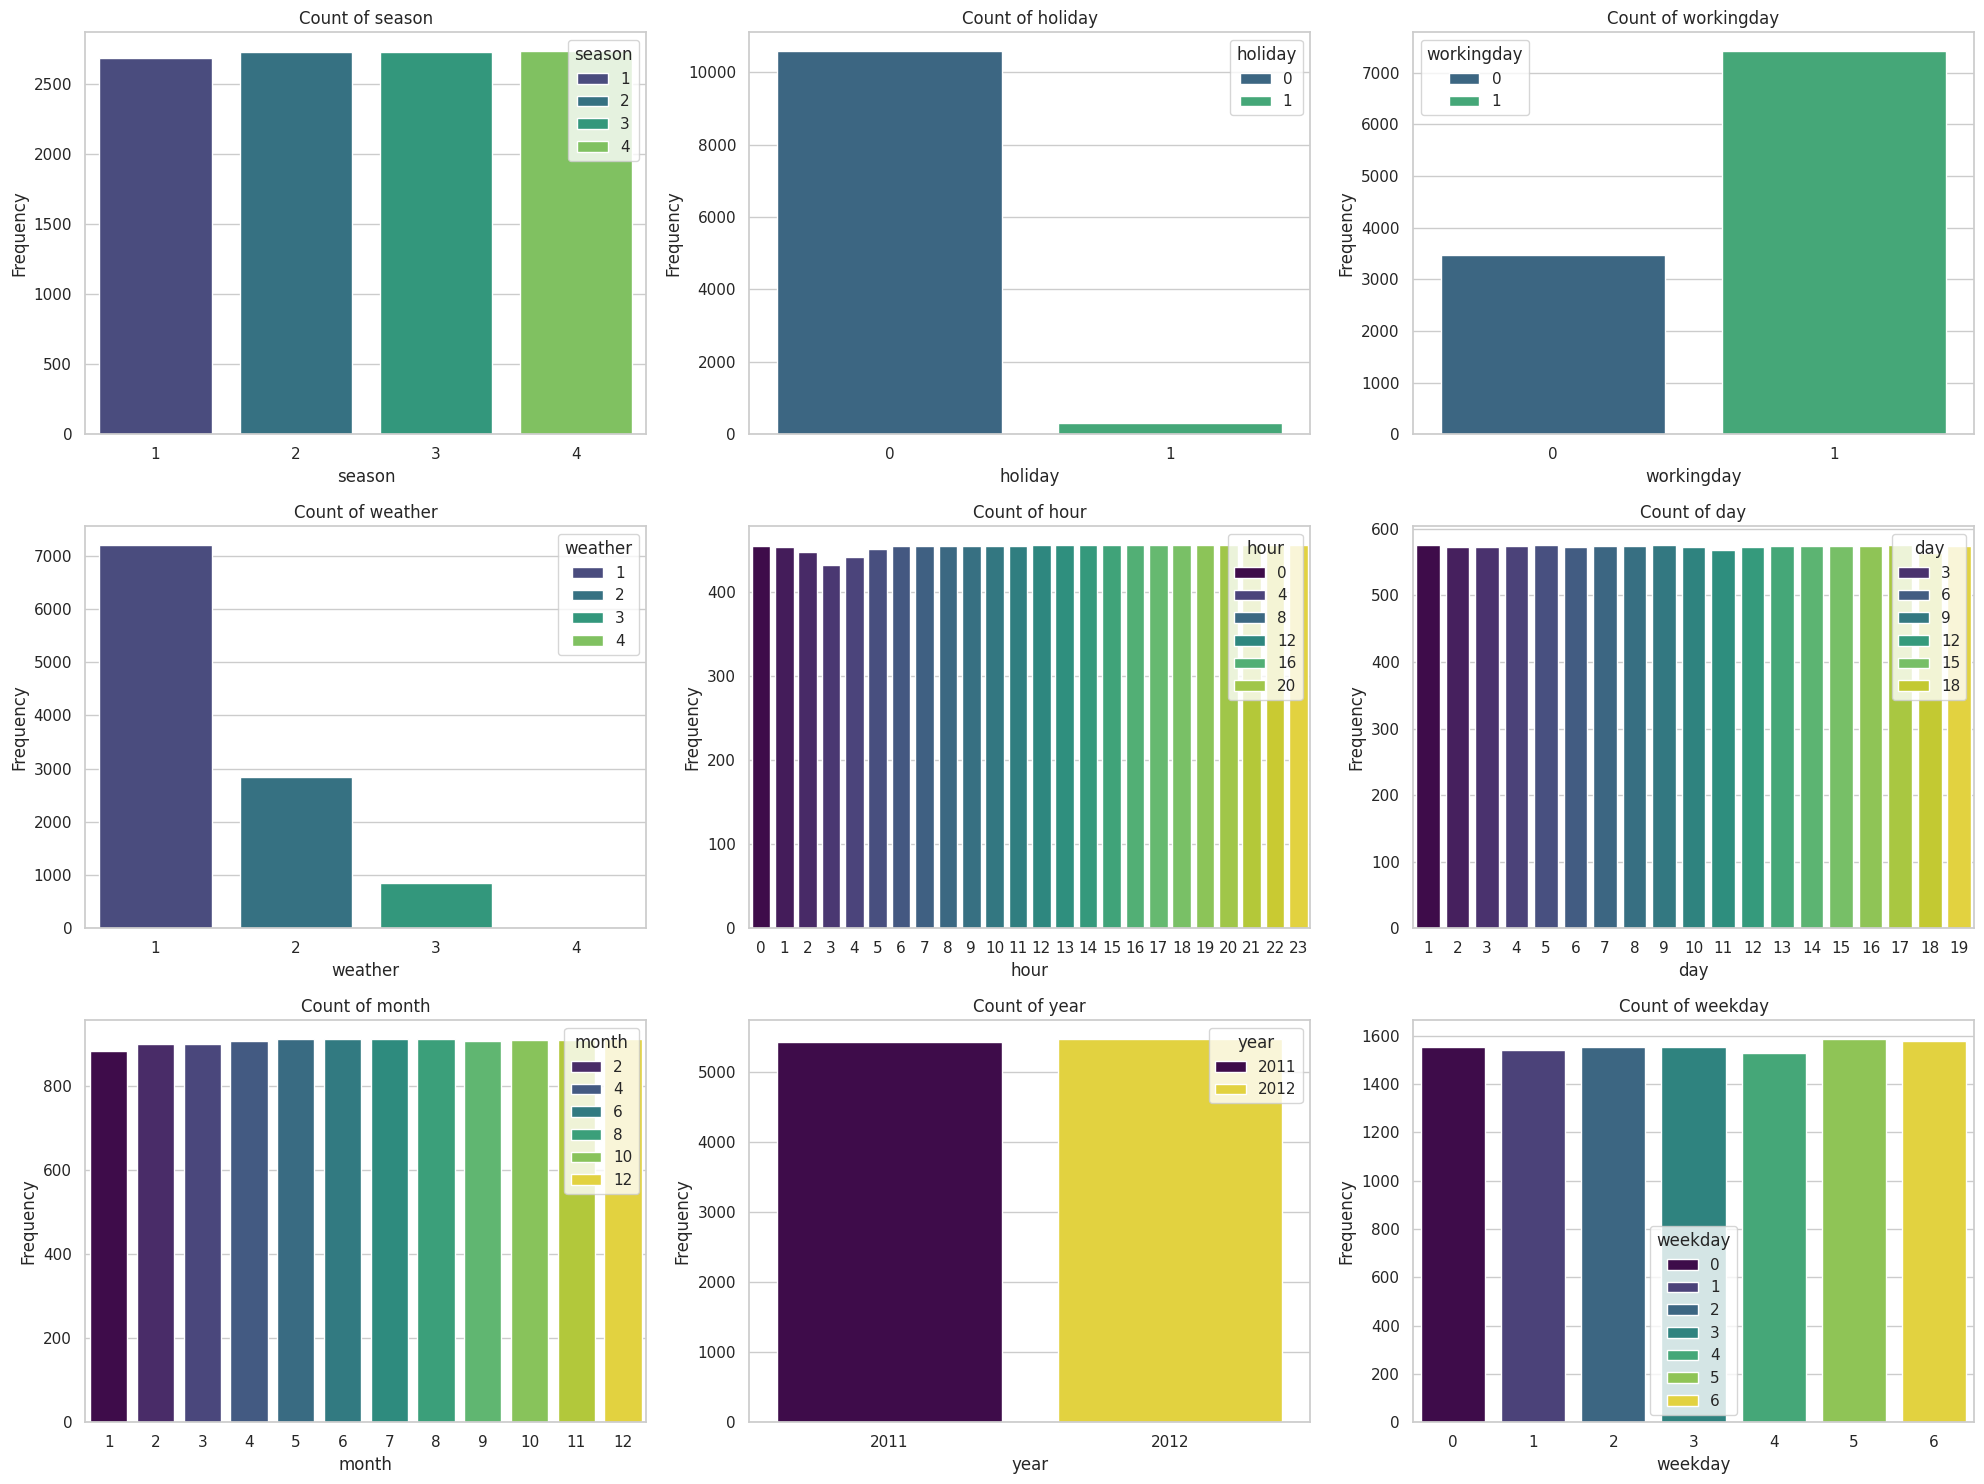

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather','hour','day','month','year','weekday']
sns.set(style='whitegrid')
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Visual Analysis:** Bivariate_Plots


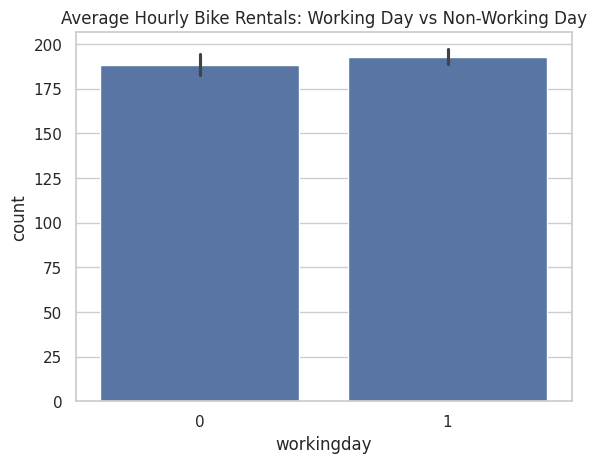

In [ ]:
#Observation:
#The current barplot shows the mean hourly count aggregated over all hours for working and non-working days. It looks almost equal
#If some hours are missing on non-working days, the simple mean across all hours could be biased or misleading.
sns.set(style='whitegrid')
sns.barplot(data=df, x='workingday', y='count', estimator='mean')
plt.title('Average Hourly Bike Rentals: Working Day vs Non-Working Day')
plt.show()

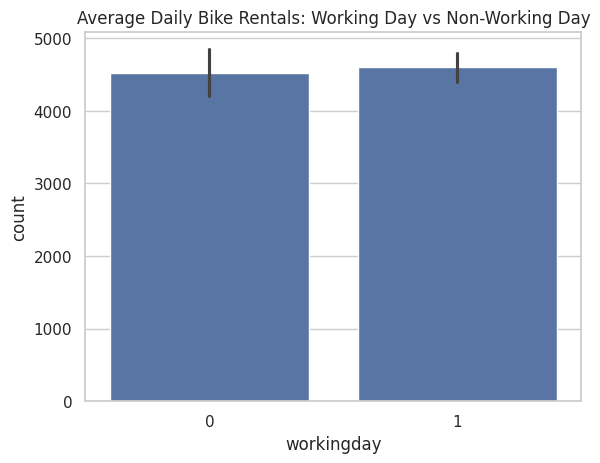

In [ ]:
#Observation:
# Average daily rentals on non-working days (workingday = 0) is about 4516,
# While on working days (workingday = 1) it's slightly higher at about 4600.
# The difference is small but measurable, suggesting rental demand is fairly
# consistent across working and non-working days on a daily total basis.

sns.set(style='whitegrid')
df['date'] = df['datetime'].dt.date
daily_df = df.groupby(['date', 'workingday'], observed=True)['count'].sum().reset_index()

sns.barplot(data=daily_df, x='workingday', y='count', estimator='mean')
plt.title('Average Daily Bike Rentals: Working Day vs Non-Working Day')
plt.show()

**Hypothesis Testing: Effect of Working Day on Daily Bike Rentals**

Hypotheses:

  H0: There is no difference in mean daily bike rentals between working days and non-working days.

  H1: There is a difference in mean daily bike rentals between working days and non-working days.

Normality Test:

  Shapiro-Wilk test shows workingday=0 group is approximately normal (p=0.0804), but workingday=1 group violates normality (p=0.0000).

Variance Test:

  Levene’s test indicates equal variances (p=0.2800).

T-test (Welch’s):

  Despite normality violation, Welch’s t-test is appropriate due to large sample size.

  Result: t = -0.434, p = 0.6646 — fail to reject H0.

Conclusion:
There is no statistically significant difference in average daily bike rentals between working and non-working days.

In [ ]:
daily_df.groupby('workingday',observed=True)["count"].mean()

,count
workingday,
0,4516.358621
1,4600.012862


In [ ]:
workingday_0 = daily_df[daily_df['workingday'] == 0]['count']
workingday_1 = daily_df[daily_df['workingday'] == 1]['count']

In [ ]:
shapiro_0 = shapiro(workingday_0)
shapiro_1 = shapiro(workingday_1)

print(f"Shapiro test for workingday=0: stat={shapiro_0.statistic:.3f}, p={shapiro_0.pvalue:.4f}")
print(f"Shapiro test for workingday=1: stat={shapiro_1.statistic:.3f}, p={shapiro_1.pvalue:.4f}")

# Levene's test for equal variances
levene_test = levene(workingday_0, workingday_1)
print(f"Levene's test: stat={levene_test.statistic:.3f}, p={levene_test.pvalue:.4f}")

Shapiro test for workingday=0: stat=0.984, p=0.0804
Shapiro test for workingday=1: stat=0.974, p=0.0000
Levene's test: stat=1.170, p=0.2800


In [ ]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(workingday_0, workingday_1, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

T-statistic: -0.434, P-value: 0.6646


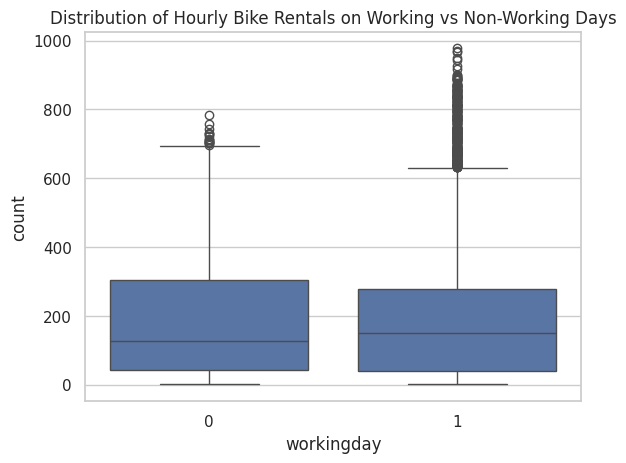

In [ ]:
#Observation:
#The median hourly rental count is higher on working days (workingday=1), as expected.
#Although many data points lie outside the whiskers (potential outliers),
#they are retained since they may represent valuable usage patterns rather than errors.

sns.boxplot(data=df, x='workingday', y='count')
plt.title('Distribution of Hourly Bike Rentals on Working vs Non-Working Days')
plt.show()

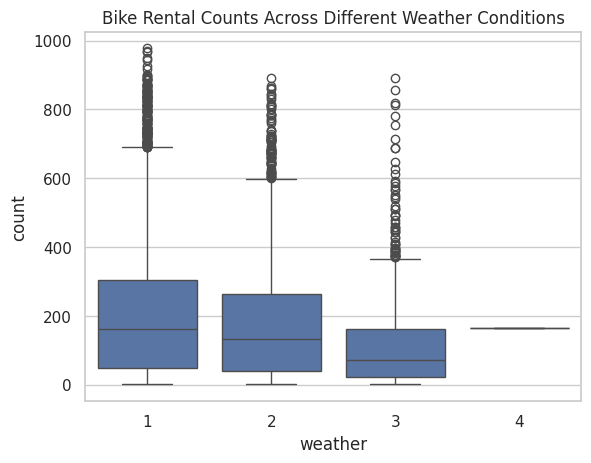

In [ ]:
#Observation: Rental counts are highest under weather condition 1 (clear or partly cloudy),
# and decrease progressively for weather categories 2 and 3 (less favorable weather).
#There is only one record for weather condition 4, so conclusions for that category are limited.
sns.boxplot(x='weather', y='count', data=df)
plt.title('Bike Rental Counts Across Different Weather Conditions')
plt.show()

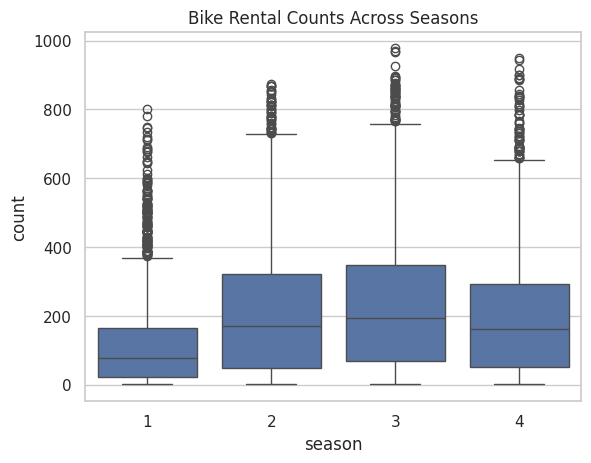

In [ ]:
#Observation: Seasons 2 (Spring), 3 (Summer), and 4 (Fall) have more data points
# and generally higher rental counts compared to Season 1 (Winter), indicating
# increased usage during warmer seasons.
sns.boxplot(x='season', y='count', data=df)
plt.title('Bike Rental Counts Across Seasons')
plt.show()

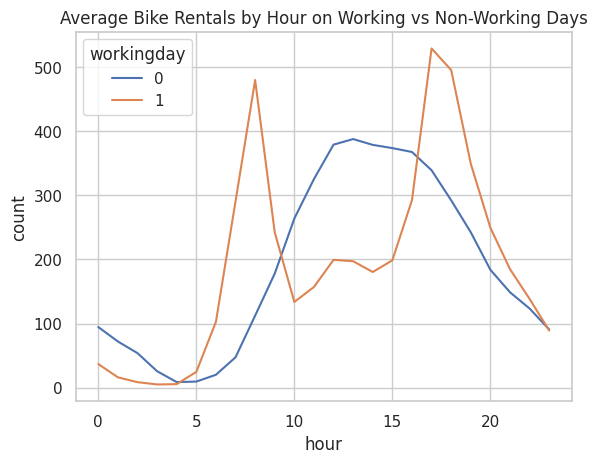

In [ ]:
#Observation:
#During working days, rental counts show clear peaks in the morning between 7-9 AM and in the
#evening between 4-7 PM, likely corresponding to typical commute hours. On non-working days, the demand
#rises gradually from around 9 AM, peaking near midday (around 12:30 PM), and then slowly declines throughout
#the afternoon until the end of the day, reflecting more leisure or flexible usage patterns.

sns.lineplot(x='hour', y='count', hue='workingday', data=df.groupby(['hour','workingday'], observed=True)['count'].mean().reset_index())
plt.title('Average Bike Rentals by Hour on Working vs Non-Working Days')
plt.show()


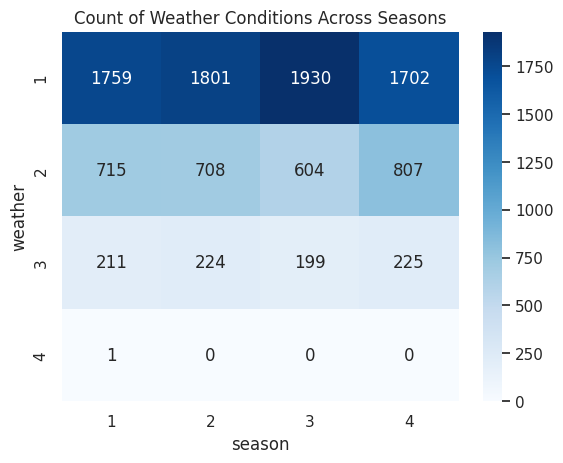

In [ ]:
#Observation:
#The heatmap shows that Weather condition 1 (clear or partly cloudy) occurs most
#frequently across all seasons. Weather condition 2 appears less often but is still present in
#all seasons. Weather conditions 3 and 4 are much rarer, with Weather 4 having the smallest counts
#overall, indicating severe or unusual weather events are infrequent.
#The distribution suggests that seasonal variation affects the likelihood of weather types,
#but good weather (Weather 1) is common year-round, while bad weather is infrequent but slightly more
#present in certain seasons.


ct = pd.crosstab(df['weather'], df['season'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Count of Weather Conditions Across Seasons')
plt.show()

/tmp/ipython-input-218-2185293940.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_season_counts = df.groupby(['weather', 'season'])['count'].sum().unstack()


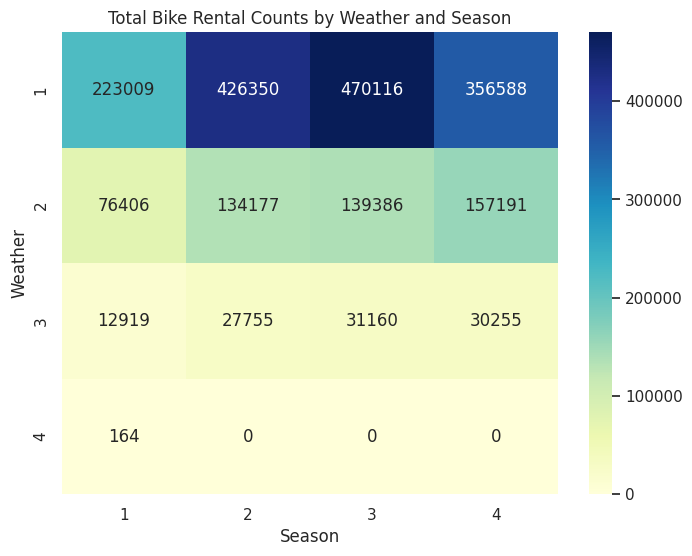

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total bike rental counts by weather and season
weather_season_counts = df.groupby(['weather', 'season'])['count'].sum().unstack()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(weather_season_counts, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Bike Rental Counts by Weather and Season')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()


**Relationship Between Temperature and Bike Rental Count**

The scatterplot with a regression line shows a positive relationship between temperature and bike rental counts, indicating that as temperature increases, bike rentals tend to increase as well.

Shapiro-Wilk tests reveal that neither temperature (temp) nor rental counts (count) are normally distributed (p-values < 0.05). Therefore, Spearman’s rank correlation—a non-parametric measure—was used to assess the relationship.

The Spearman correlation coefficient of 0.408 (p < 0.0001) indicates a moderate positive correlation between temperature and bike rentals, suggesting that warmer temperatures are associated with higher bike usage. This insight can help Yulu plan for increased demand during warmer periods.

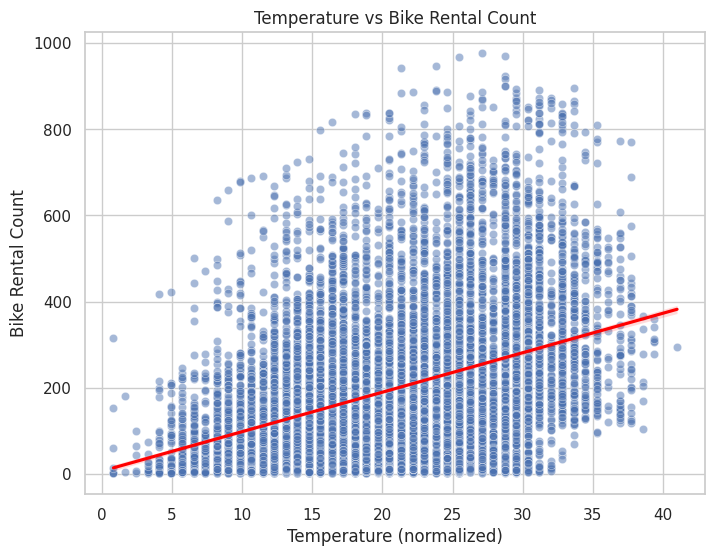

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='temp', y='count', alpha=0.5)
sns.regplot(data=df, x='temp', y='count', scatter=False, color='red')
plt.title('Temperature vs Bike Rental Count')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Bike Rental Count')
plt.show()


In [ ]:
corr_coef, p_value = pearsonr(df['temp'], df['count'])
print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.394
P-value: 0.0000


In [ ]:
stat_temp, p_temp = shapiro(df['temp'])
stat_count, p_count = shapiro(df['count'])
print(f"Shapiro-Wilk test for temp: stat={stat_temp:.3f}, p={p_temp:.4f}")
print(f"Shapiro-Wilk test for count: stat={stat_count:.3f}, p={p_count:.4f}")

# Decide which correlation to use
if p_temp > 0.05 and p_count > 0.05:
    print("Both variables are normally distributed, Pearson correlation is appropriate.")
else:
    print("At least one variable is not normal, using Spearman correlation instead.")
    corr, p_val = spearmanr(df['temp'], df['count'])
    print(f"Spearman correlation coefficient: {corr:.3f}, p-value: {p_val:.4f}")

Shapiro-Wilk test for temp: stat=0.980, p=0.0000
Shapiro-Wilk test for count: stat=0.878, p=0.0000
At least one variable is not normal, using Spearman correlation instead.
Spearman correlation coefficient: 0.408, p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


**Relationship Between "atemp" (Feels Like Temperature) and Bike Rental Count**

The scatterplot with regression line between atemp and bike rental count shows a positive association, indicating that as the "feels like" temperature increases, bike rentals also tend to increase.

Shapiro-Wilk normality tests indicate that neither atemp nor rental counts are normally distributed (p-values < 0.05). Therefore, Spearman’s rank correlation, a non-parametric test, was used to measure the relationship.

The Spearman correlation coefficient of 0.407 (p < 0.0001) signifies a moderate positive correlation between "feels like" temperature and bike rentals, consistent with the relationship observed with actual temperature (temp). This suggests that both actual and perceived temperatures influence bike rental demand similarly.

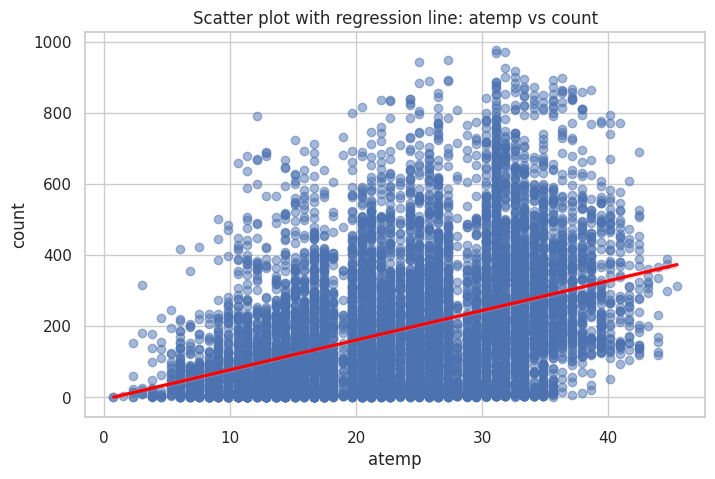

Shapiro-Wilk test for atemp: stat=0.982, p=0.0000
Shapiro-Wilk test for count: stat=0.878, p=0.0000
At least one variable is not normal; using Spearman correlation.
Correlation coefficient: 0.407, p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:

# Plot scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='atemp', y='count', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter plot with regression line: atemp vs count')
plt.show()

# Normality tests
stat_atemp, p_atemp = shapiro(df['atemp'])
stat_count, p_count = shapiro(df['count'])
print(f"Shapiro-Wilk test for atemp: stat={stat_atemp:.3f}, p={p_atemp:.4f}")
print(f"Shapiro-Wilk test for count: stat={stat_count:.3f}, p={p_count:.4f}")

# Choose correlation test
if p_atemp > 0.05 and p_count > 0.05:
    corr, p_val = pearsonr(df['atemp'], df['count'])
    print("Both variables are normal; using Pearson correlation.")
else:
    corr, p_val = spearmanr(df['atemp'], df['count'])
    print("At least one variable is not normal; using Spearman correlation.")

print(f"Correlation coefficient: {corr:.3f}, p-value: {p_val:.4f}")


**Relationship Between Humidity and Bike Rental Count**

The scatter plot with regression line for humidity vs bike rental count shows a negative trend, indicating that higher humidity tends to correspond with lower bike rental counts.

Shapiro-Wilk tests reveal that both humidity and count are not normally distributed (p-values < 0.05). Consequently, Spearman’s rank correlation was used to assess the relationship.

The Spearman correlation coefficient is -0.354 (p < 0.0001), indicating a moderate negative correlation between humidity and bike rentals. This suggests that as humidity increases, bike rental activity decreases, likely due to less comfortable or less favorable riding conditions on more humid days.

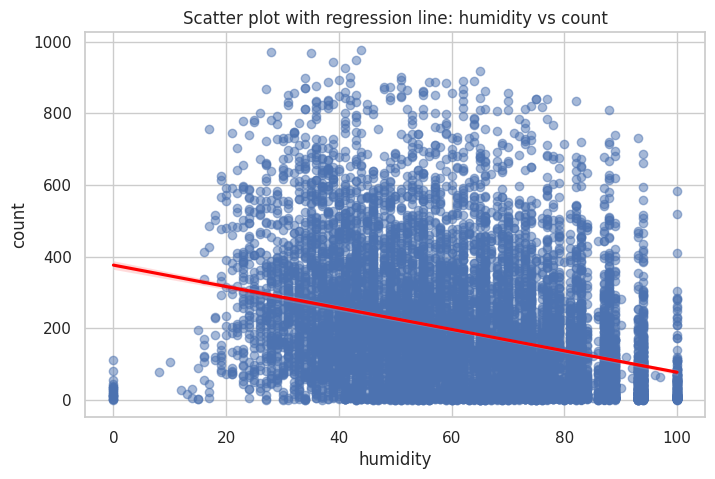

Shapiro-Wilk test for humidity: stat=0.982, p=0.0000
Shapiro-Wilk test for count: stat=0.878, p=0.0000
At least one variable is not normal; using Spearman correlation.
Correlation coefficient: -0.354, p-value: 0.0000


In [ ]:
# Plot scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='humidity', y='count', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter plot with regression line: humidity vs count')
plt.show()

# Normality tests
stat_humidity, p_humidity = shapiro(df['humidity'])
stat_count, p_count = shapiro(df['count'])
print(f"Shapiro-Wilk test for humidity: stat={stat_humidity:.3f}, p={p_humidity:.4f}")
print(f"Shapiro-Wilk test for count: stat={stat_count:.3f}, p={p_count:.4f}")

# Choose correlation test
if p_humidity > 0.05 and p_count > 0.05:
    corr, p_val = pearsonr(df['humidity'], df['count'])
    print("Both variables are normal; using Pearson correlation.")
else:
    corr, p_val = spearmanr(df['humidity'], df['count'])
    print("At least one variable is not normal; using Spearman correlation.")

print(f"Correlation coefficient: {corr:.3f}, p-value: {p_val:.4f}")


 **Relationship Between Windspeed and Bike Rental Count**

The scatter plot with regression line between windspeed and bike rental count shows a slight positive trend.

Normality tests indicate that both windspeed and count are not normally distributed (p-values < 0.05). Therefore, Spearman’s rank correlation was applied.

The Spearman correlation coefficient is 0.136 (p < 0.0001), indicating a weak but statistically significant positive correlation between windspeed and bike rentals. This suggests that, counterintuitively, bike rentals slightly increase with higher windspeed, though the relationship is weak and other factors might influence this.

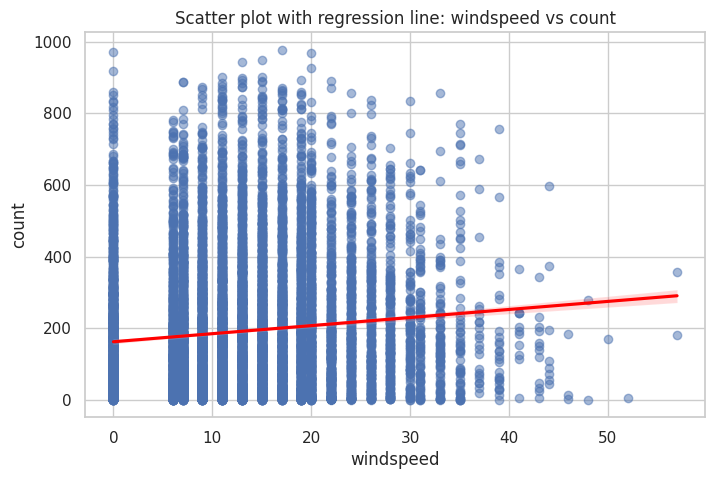

Shapiro-Wilk test for windspeed: stat=0.959, p=0.0000
Shapiro-Wilk test for count: stat=0.878, p=0.0000
At least one variable is not normal; using Spearman correlation.
Correlation coefficient: 0.136, p-value: 0.0000


In [ ]:
# Plot scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='windspeed', y='count', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter plot with regression line: windspeed vs count')
plt.show()

# Normality tests
stat_windspeed, p_windspeed = shapiro(df['windspeed'])
stat_count, p_count = shapiro(df['count'])
print(f"Shapiro-Wilk test for windspeed: stat={stat_windspeed:.3f}, p={p_windspeed:.4f}")
print(f"Shapiro-Wilk test for count: stat={stat_count:.3f}, p={p_count:.4f}")

# Choose correlation test
if p_windspeed > 0.05 and p_count > 0.05:
    corr, p_val = pearsonr(df['windspeed'], df['count'])
    print("Both variables are normal; using Pearson correlation.")
else:
    corr, p_val = spearmanr(df['windspeed'], df['count'])
    print("At least one variable is not normal; using Spearman correlation.")

print(f"Correlation coefficient: {corr:.3f}, p-value: {p_val:.4f}")


**Distribution of Daily Bike Rentals by Month**

The boxplot illustrates the monthly distribution of daily bike rentals:

There is a gradual increase in bike rentals from January to June, indicating rising usage in the first half of the year.

The count remains relatively stable during July, August, September, and October.

Bike rentals start to decline from November to December, possibly due to seasonal factors such as colder weather or holidays.

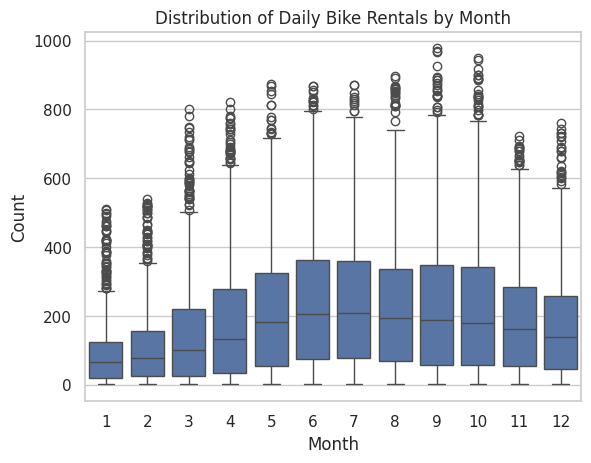

In [ ]:
sns.boxplot(data=df, x='month', y='count')
plt.title('Distribution of Daily Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**Hourly Bike Rental Trends – Casual vs Registered Users**

The line plot reveals distinct usage patterns between casual and registered users throughout the day:

1. Registered users show sharp peaks during commute hours, with a morning peak between 6–9 AM and an evening peak from 4–7 PM, aligning with typical work schedules.

2. Casual users exhibit a more gradual and broader peak, with activity rising between 10 AM and 6 PM, and the absolute peak occurring between 1–3 PM. This likely reflects leisure or non-commute usage.

These patterns suggest that registered users use bikes for commuting, while casual users likely rent for recreational or flexible travel during daylight hours.

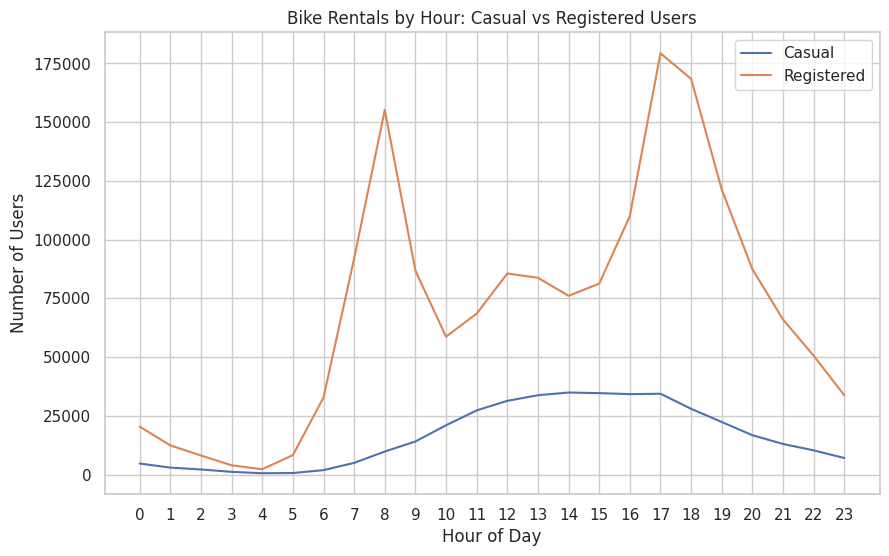

In [ ]:

# Group by hour and sum casual and registered counts
hourly_users = df.groupby('hour')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_users, x='hour', y='casual', label='Casual')
sns.lineplot(data=hourly_users, x='hour', y='registered', label='Registered')

plt.title('Bike Rentals by Hour: Casual vs Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Users')
plt.legend()
plt.xticks(range(0,24))
plt.show()


**Hourly Usage Patterns by Day – Casual vs Registered Users**

Across all days of the week, the usage patterns for casual and registered users remain consistent with earlier findings:

1. Registered users consistently show distinct commuting peaks—in the morning (6–9 AM) and evening (4–7 PM)—indicating work-related travel.

2. Casual users demonstrate a gradual increase in usage, peaking around 1–3 PM, which is indicative of leisure or non-work-related activities.

These trends hold steady regardless of the day, suggesting that registered users maintain routine commuting behavior, while casual users follow more flexible, mid-day usage patterns throughout the week.

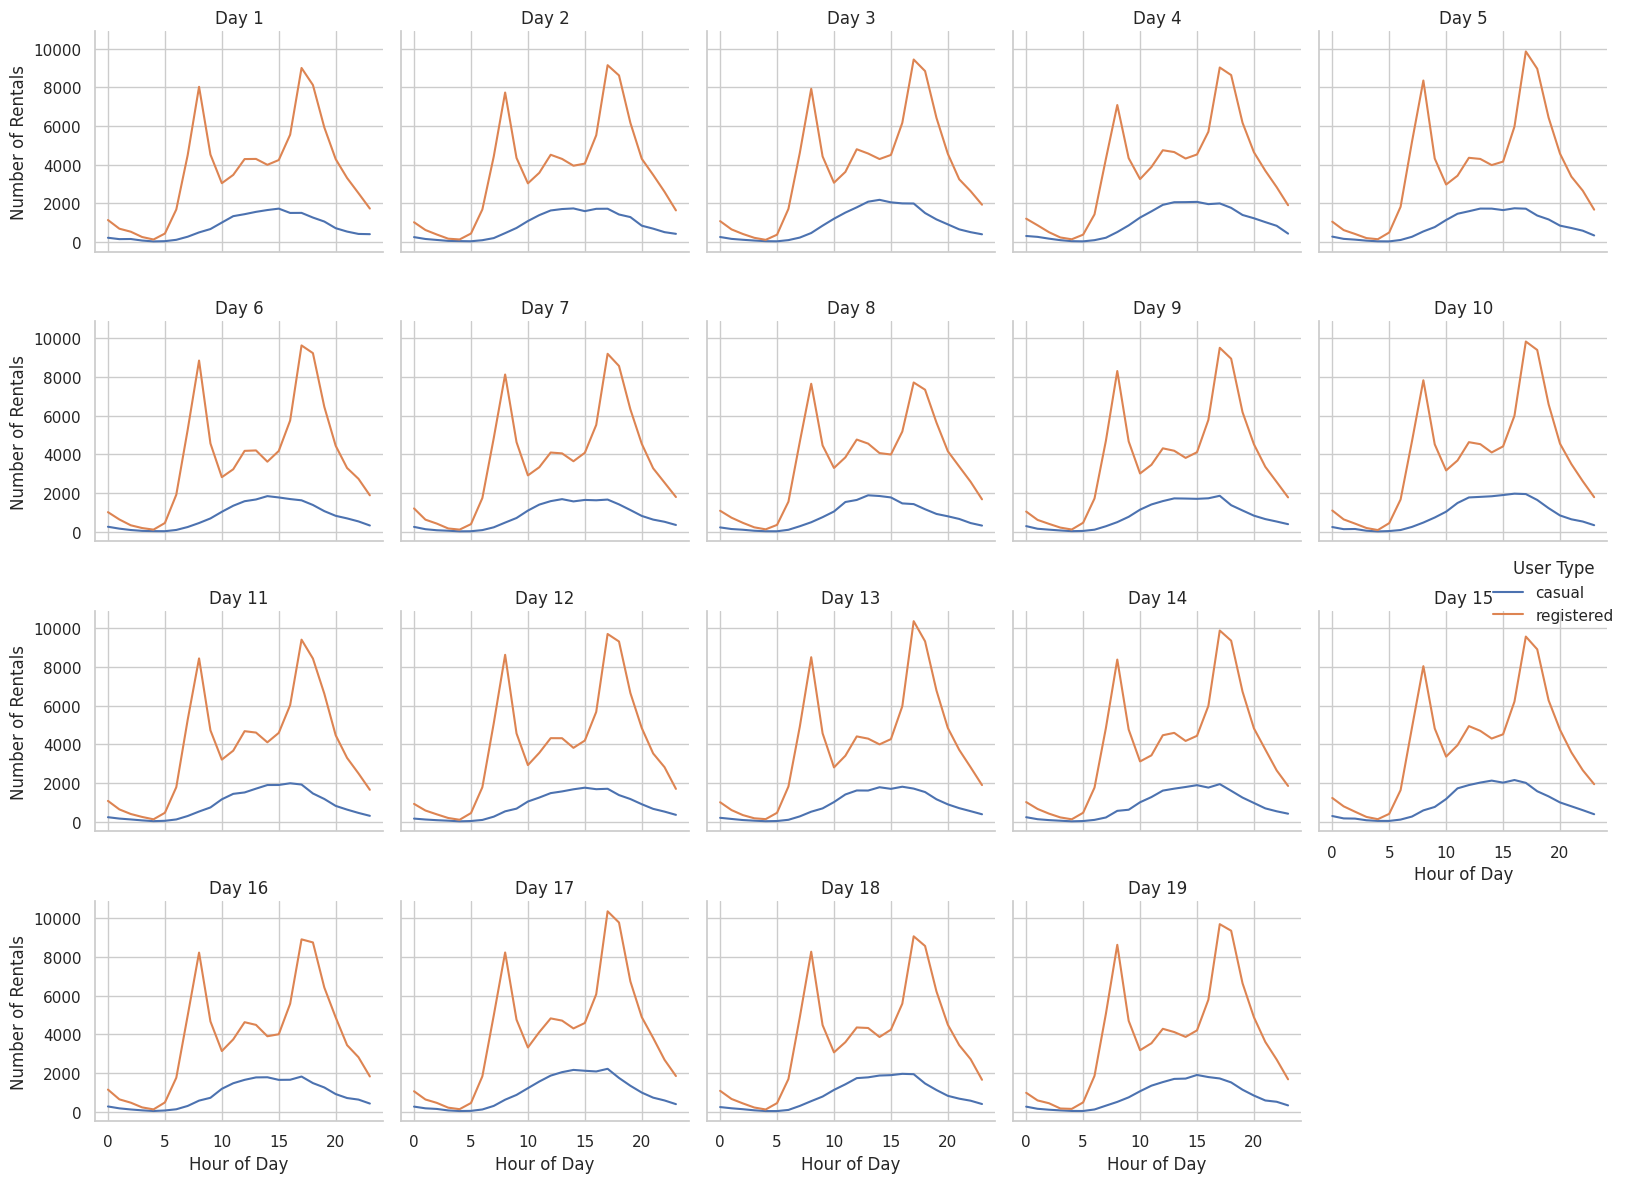

In [ ]:

# Make sure 'day' and 'hour' are int (if not already)
df['day'] = df['day'].astype(int)
df['hour'] = df['hour'].astype(int)

# Aggregate data: sum casual and registered by day and hour
agg = df.groupby(['day', 'hour'])[['casual', 'registered']].sum().reset_index()

# Melt the dataframe to long format for easier plotting
melted = agg.melt(id_vars=['day', 'hour'], value_vars=['casual', 'registered'],
                  var_name='user_type', value_name='count')

# Plot using FacetGrid, one subplot per day
g = sns.FacetGrid(melted, col='day', col_wrap=5, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x='hour', y='count', hue='user_type')

# Adjustments
g.add_legend(title='User Type')
g.set_axis_labels('Hour of Day', 'Number of Rentals')
g.set_titles('Day {col_name}')
plt.tight_layout()
plt.show()


**Weekday Bike Rental Patterns by User Type**

The plot reveals distinct weekday trends for casual and registered users:

  Registered users (majority group):

      Show slightly increasing rentals from Monday to Thursday.

      Rentals drop sharply on Saturday and Sunday, indicating reduced weekday commuting activity.

      This supports the idea that registered users are mostly daily commuters, likely using bikes for work travel.

  Casual users:

      Rentals decline from Monday through Thursday, suggesting low midweek activity.

      A notable surge in usage on Friday, Saturday, and Sunday, with Saturday being the peak, suggests usage for recreational or weekend purposes.

This pattern strongly implies that:

  Registered users = weekday commuters.

  Casual users = weekend/leisure riders.

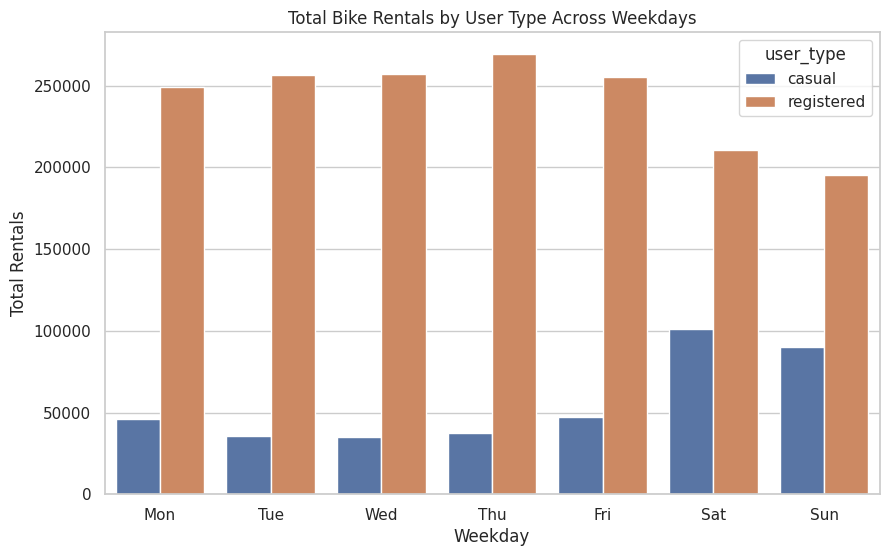

In [ ]:
# Aggregate total casual and registered counts by weekday
weekday_sum = df.groupby('weekday')[['casual', 'registered']].sum().reset_index()

# If weekday is numeric (0=Monday,...), map to names for clarity
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weekday_sum['weekday_name'] = weekday_sum['weekday'].map(weekday_map)

# Melt for plotting
melted = weekday_sum.melt(id_vars='weekday_name', value_vars=['casual', 'registered'],
                          var_name='user_type', value_name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='weekday_name', y='count', hue='user_type')
plt.title('Total Bike Rentals by User Type Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.show()


**Yearly Trend in Bike Rentals**

The bar plot comparing total bike rentals by year shows a clear increase in 2012 compared to 2011.

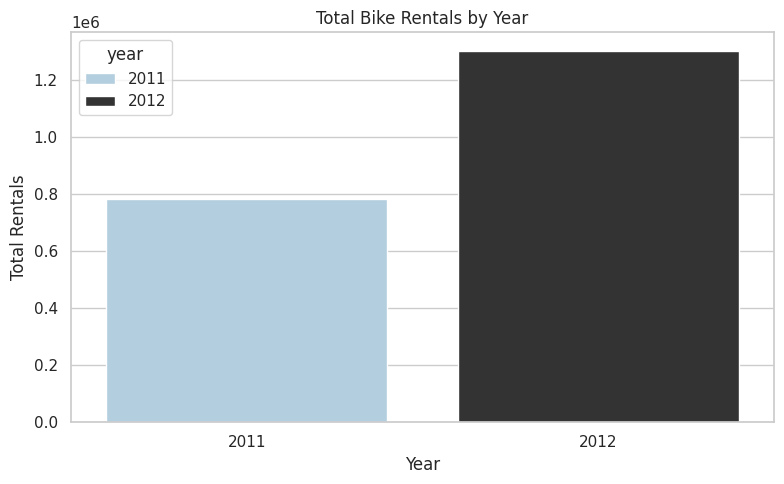

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and sum the total counts
yearly_counts = df.groupby('year')['count'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_counts, x='year', y='count', hue='year',palette='Blues_d')
plt.title('Total Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()


# **Effect of Weather Change from 2011 to 2012**

Hypothesis:

    H₀ (Null): The distribution of weather conditions is the same in 2011 and 2012.

    H₁ (Alternative): The distribution of weather conditions is different between the two years.

Chi-square test result: χ² = 13.415, p = 0.0038

Observation:
Since the p-value is less than 0.05, we reject the null hypothesis. This indicates a significant difference in weather distribution between 2011 and 2012. Visually, 2012 had slightly more days with clear or misty weather and fewer with bad weather (category 3 or 4). This suggests that weather conditions improved in 2012, which could be one of the contributing factors to the increased bike rentals that year.

weather     1     2    3  4
year                       
2011     3583  1366  473  0
2012     3609  1468  386  1


/tmp/ipython-input-47-960832545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_by_year = df.groupby(['year', 'weather']).size().unstack(fill_value=0)


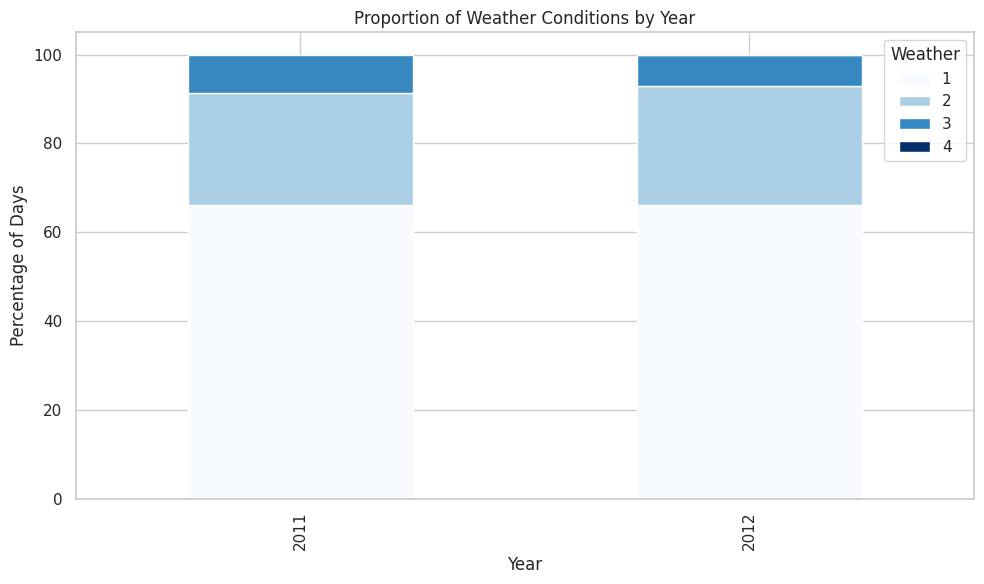

Chi-square test: chi2=13.415, p=0.0038


In [ ]:
weather_by_year = df.groupby(['year', 'weather']).size().unstack(fill_value=0)
print(weather_by_year)
weather_by_year_pct = weather_by_year.div(weather_by_year.sum(axis=1), axis=0) * 100

weather_by_year_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Blues')
plt.title('Proportion of Weather Conditions by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days')
plt.legend(title='Weather')
plt.tight_layout()
plt.show()
chi2, p, dof, expected = chi2_contingency(weather_by_year)
print(f"Chi-square test: chi2={chi2:.3f}, p={p:.4f}")

**Statistical Evidence of Significant Increase in Bike Rentals from 2011 to 2012 for Both Casual and Registered Users**
Hypothesis:

  H0: There is no difference in the mean daily bike rentals (casual and registered users) between 2011 and 2012.

  H1: There is a significant difference in the mean daily bike rentals (casual and registered users) between 2011 and 2012.

Observation and Inference:

Normality tests show both user types’ data are not normally distributed. Despite this, Welch’s t-test reveals a highly significant increase in daily rentals for both registered (p < 0.0001) and casual users (p < 0.0001) from 2011 to 2012. This supports rejecting H0, indicating bike rentals increased significantly in 2012 for both user groups.

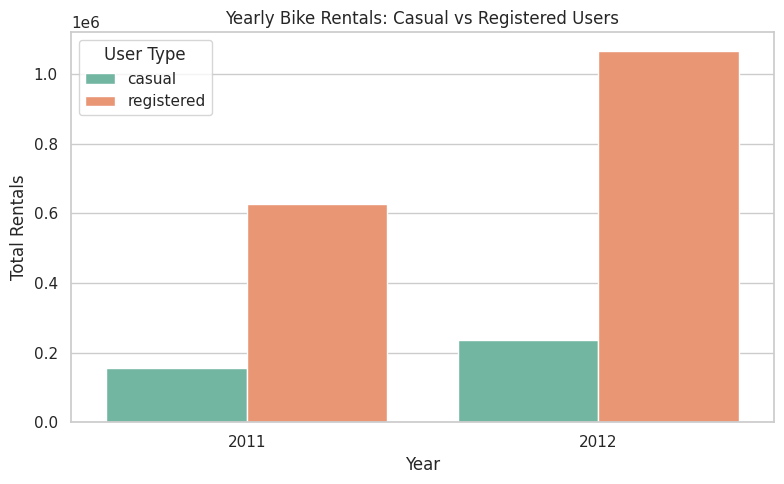

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and aggregate casual and registered counts
yearly_user_counts = df.groupby('year')[['casual', 'registered']].sum().reset_index()

# Melt the dataframe to long format for seaborn
yearly_user_counts_melted = yearly_user_counts.melt(id_vars='year',
                                                     value_vars=['casual', 'registered'],
                                                     var_name='User Type',
                                                     value_name='Count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_user_counts_melted, x='year', y='Count', hue='User Type', palette='Set2')
plt.title('Yearly Bike Rentals: Casual vs Registered Users')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()


In [ ]:
# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year
df['year'] = df['date'].dt.year

# Group by date to get daily totals
daily_users = df.groupby(['date', 'year'])[['casual', 'registered']].sum().reset_index()

# Split by year
users_2011 = daily_users[daily_users['year'] == 2011]
users_2012 = daily_users[daily_users['year'] == 2012]
from scipy.stats import shapiro

# Shapiro-Wilk normality test
shapiro_2011_reg = shapiro(users_2011['registered'])
shapiro_2012_reg = shapiro(users_2012['registered'])

shapiro_2011_cas = shapiro(users_2011['casual'])
shapiro_2012_cas = shapiro(users_2012['casual'])

print("Registered users normality p-values:", shapiro_2011_reg.pvalue, shapiro_2012_reg.pvalue)
print("Casual users normality p-values:", shapiro_2011_cas.pvalue, shapiro_2012_cas.pvalue)

reg_2011 = df[df['year'] == 2011]['registered']
reg_2012 = df[df['year'] == 2012]['registered']

cas_2011 = df[df['year'] == 2011]['casual']
cas_2012 = df[df['year'] == 2012]['casual']

# Perform Welch's t-test (unequal variance)
t_reg, p_reg = ttest_ind(reg_2011, reg_2012, equal_var=False)
t_cas, p_cas = ttest_ind(cas_2011, cas_2012, equal_var=False)

print(f"Registered users t-test: t={t_reg:.3f}, p={p_reg:.4f}")
print(f"Casual users t-test: t={t_cas:.3f}, p={p_cas:.4f}")

Registered users normality p-values: 1.219783006477652e-07 0.0011363319400386268
Casual users normality p-values: 1.4013729901708556e-12 1.6876063340978753e-11
Registered users t-test: t=-28.635, p=0.0000
Casual users t-test: t=-15.336, p=0.0000


**Hypothesis Testing and Observations on Effect of Holiday on Bike Rentals**

  H0: There is no difference in bike rentals between holiday and non-holiday periods.

  H1: There is a difference in bike rentals between holiday and non-holiday periods.

Normality & Variance Checks:

  Shapiro-Wilk tests show significant deviation from normality for all groups (p < 0.001).

  Levene’s tests indicate unequal variances for casual users (p < 0.001) and borderline unequal variances for registered users (p = 0.046).

T-Test Results (Welch’s t-test used due to unequal variances):

  Casual users: t = 3.732, p = 0.0002

  Registered users: t = -2.671, p = 0.0079

Inference:
We reject the null hypothesis for both casual and registered users. There is a statistically significant difference in bike rentals on holidays compared to non-holidays. Casual rentals increase on holidays, while registered rentals decrease slightly, reflecting different user behavior patterns on holidays.

In [ ]:
from scipy import stats

# Split data into holiday and non-holiday
casual_holiday = df[df['holiday'] == 1]['casual']
casual_nonholiday = df[df['holiday'] == 0]['casual']
registered_holiday = df[df['holiday'] == 1]['registered']
registered_nonholiday = df[df['holiday'] == 0]['registered']

# Shapiro-Wilk normality test
print("Shapiro-Wilk Normality Test:")
print("Casual - Holiday:", stats.shapiro(casual_holiday))
print("Casual - Non-Holiday:", stats.shapiro(casual_nonholiday))
print("Registered - Holiday:", stats.shapiro(registered_holiday))
print("Registered - Non-Holiday:", stats.shapiro(registered_nonholiday))

# Levene’s Test for Equal Variance
print("\nLevene’s Test for Equal Variance:")
print("Casual:", stats.levene(casual_holiday, casual_nonholiday))
print("Registered:", stats.levene(registered_holiday, registered_nonholiday))

# Two-sample independent t-tests (Welch’s t-test if variances unequal)
print("\nT-test (Casual):")
print(stats.ttest_ind(casual_holiday, casual_nonholiday, equal_var=False))

print("\nT-test (Registered):")
print(stats.ttest_ind(registered_holiday, registered_nonholiday, equal_var=False))


Shapiro-Wilk Normality Test:
Casual - Holiday: ShapiroResult(statistic=np.float64(0.7683672926630993), pvalue=np.float64(1.198029089931825e-20))
Casual - Non-Holiday: ShapiroResult(statistic=np.float64(0.7032171264163595), pvalue=np.float64(1.1616174296207799e-86))
Registered - Holiday: ShapiroResult(statistic=np.float64(0.897269289584639), pvalue=np.float64(1.1401315445360955e-13))
Registered - Non-Holiday: ShapiroResult(statistic=np.float64(0.8555691757598584), pvalue=np.float64(6.559466393078257e-71))

Levene’s Test for Equal Variance:
Casual: LeveneResult(statistic=np.float64(22.147373319253717), pvalue=np.float64(2.556136321605301e-06))
Registered: LeveneResult(statistic=np.float64(3.9925340401374547), pvalue=np.float64(0.04572711847188819))

T-test (Casual):
TtestResult(statistic=np.float64(3.7322576760406108), pvalue=np.float64(0.00022429836461968826), df=np.float64(321.94702225658597))

T-test (Registered):
TtestResult(statistic=np.float64(-2.6708368265939715), pvalue=np.float6

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10575.
  res = hypotest_fun_out(*samples, **kwds)


**Hypothesis Testing and Observations for Weather and Season Effects on Bike Rentals**

Weather vs Count

  H0: There is no significant difference in bike rental counts across different weather categories.

  H1: There is a significant difference in bike rental counts across different weather categories.

Assumptions Check:

  Levene’s test showed significant variance differences between weather groups (p < 0.001), violating homogeneity of variance assumption.

  Shapiro-Wilk tests for all weather groups indicate non-normality (p < 0.001).

  Skewness and kurtosis values also suggest departure from normality.

ANOVA Result:

  F(3, N) = 65.530, p < 0.001

Inference:
Despite violation of some assumptions, the ANOVA shows a highly significant difference in bike rental counts between weather categories. This suggests that weather conditions do affect bike rentals.


--- Assumption checks for weather ---

Levene's test: stat=54.851, p=0.0000

Group: 1
 Shapiro-Wilk: stat=0.891, p=0.0000
 Skewness: 1.140, Kurtosis: 0.963


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


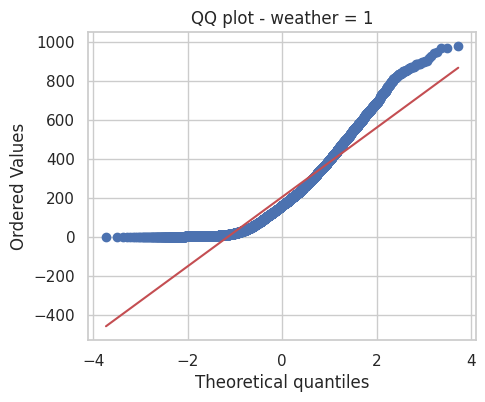


Group: 2
 Shapiro-Wilk: stat=0.877, p=0.0000
 Skewness: 1.294, Kurtosis: 1.584


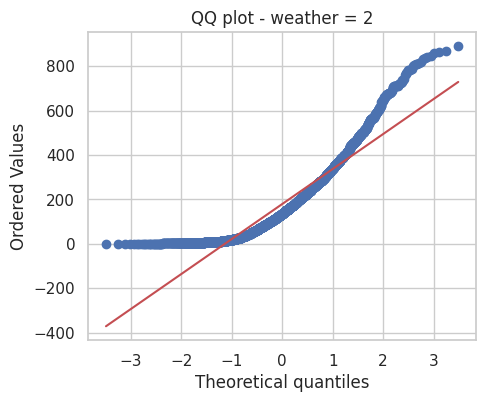


Group: 3
 Shapiro-Wilk: stat=0.767, p=0.0000
 Skewness: 2.183, Kurtosis: 5.961


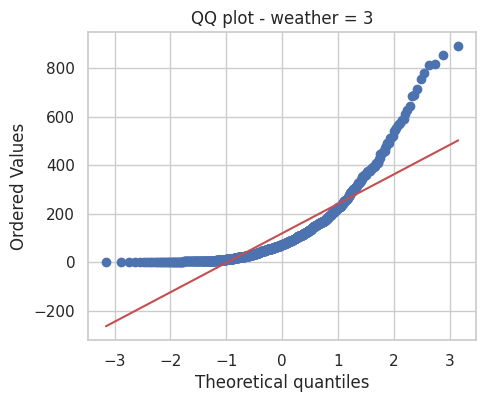


Group: 4
 Shapiro-Wilk: stat=nan, p=nan
 Skewness: nan, Kurtosis: nan


/tmp/ipython-input-223-1596126691.py:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_stat, shapiro_p = stats.shapiro(data)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10730: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10744: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10750: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


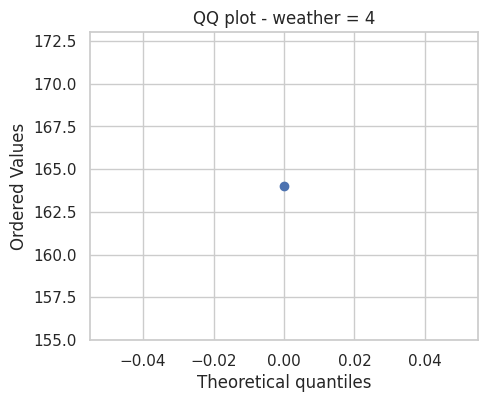

--- Assumption checks for season ---

Levene's test: stat=187.771, p=0.0000

Group: 1
 Shapiro-Wilk: stat=0.809, p=0.0000
 Skewness: 1.887, Kurtosis: 4.304


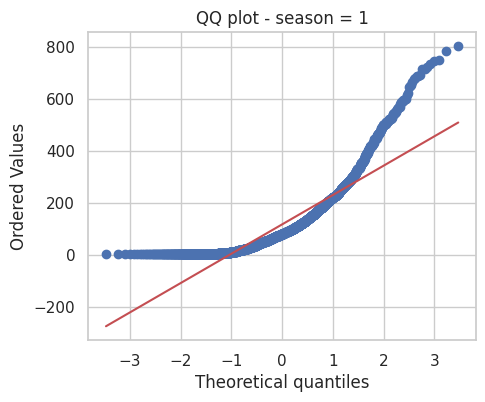


Group: 2
 Shapiro-Wilk: stat=0.900, p=0.0000
 Skewness: 1.003, Kurtosis: 0.422


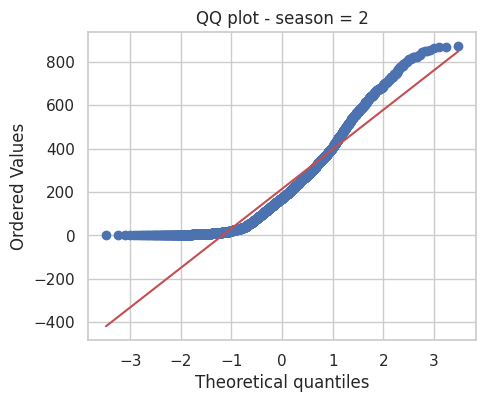


Group: 3
 Shapiro-Wilk: stat=0.915, p=0.0000
 Skewness: 0.991, Kurtosis: 0.696


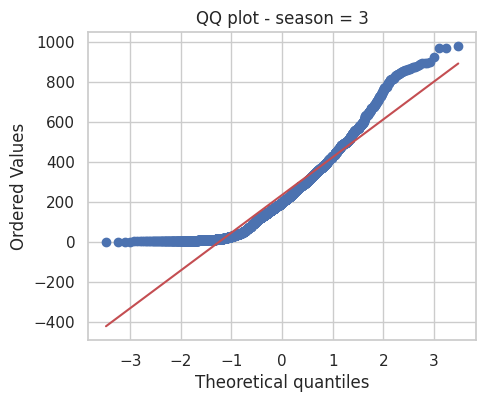


Group: 4
 Shapiro-Wilk: stat=0.895, p=0.0000
 Skewness: 1.171, Kurtosis: 1.269


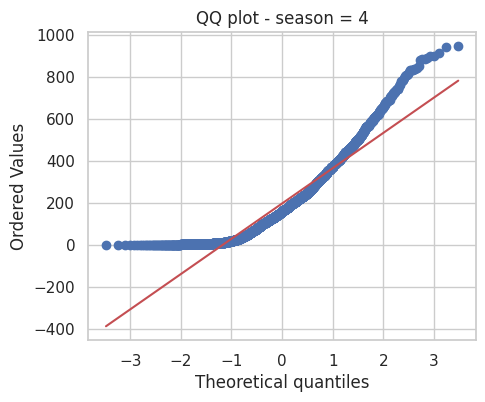

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

def check_assumptions(df, group_col, target_col='count'):
    categories = df[group_col].cat.categories

    print(f"--- Assumption checks for {group_col} ---\n")

    # Levene's test for homogeneity of variance
    groups = [df[df[group_col] == cat][target_col] for cat in categories]
    levene_stat, levene_p = stats.levene(*groups)
    print(f"Levene's test: stat={levene_stat:.3f}, p={levene_p:.4f}")

    for cat in categories:
        data = df[df[group_col] == cat][target_col]
        print(f"\nGroup: {cat}")

        # Shapiro-Wilk test for normality
        shapiro_stat, shapiro_p = stats.shapiro(data)
        print(f" Shapiro-Wilk: stat={shapiro_stat:.3f}, p={shapiro_p:.4f}")

        # Skewness and Kurtosis
        sk = skew(data)
        kurt = kurtosis(data)
        print(f" Skewness: {sk:.3f}, Kurtosis: {kurt:.3f}")

        # QQ plot
        plt.figure(figsize=(5,4))
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f"QQ plot - {group_col} = {cat}")
        plt.show()

# Run for weather
check_assumptions(df, 'weather')

# Run for season
check_assumptions(df, 'season')


In [ ]:
# Extract count groups by weather categories
groups_weather = [df[df['weather'] == cat]['count'] for cat in df['weather'].cat.categories]

# Run one-way ANOVA
f_stat_weather, p_val_weather = f_oneway(*groups_weather)
print(f"ANOVA Weather vs Count: F-statistic = {f_stat_weather:.3f}, p-value = {p_val_weather:.4f}")

ANOVA Weather vs Count: F-statistic = 65.530, p-value = 0.0000


**Season vs Count**

  H0: There is no significant difference in bike rental counts across different seasons.

  H1: There is a significant difference in bike rental counts across different seasons.

Assumptions Check:

  Levene’s test again indicates unequal variances between seasons (p < 0.001).

  Shapiro-Wilk tests for all season groups show non-normality (p < 0.001).

  Skewness and kurtosis indicate non-normal distributions.

ANOVA Result:

  F(3, N) = 236.947, p < 0.001

Inference:
Despite assumption violations, the ANOVA reveals a very strong significant effect of season on bike rental counts, indicating seasonality plays a major role in rental patterns.

**Summary:** Both weather and season have statistically significant effects on daily bike rental counts.

In [ ]:
groups_season = [df[df['season'] == cat]['count'] for cat in df['season'].cat.categories]

# Run one-way ANOVA
f_stat_season, p_val_season = f_oneway(*groups_season)
print(f"ANOVA Season vs Count: F-statistic = {f_stat_season:.3f}, p-value = {p_val_season:.4f}")

ANOVA Season vs Count: F-statistic = 236.947, p-value = 0.0000


In [ ]:
groups_weather=[df[df['weather']==cat]['count'] for cat in df['weather'].cat.categories]


**Hypothesis Testing and Observation for Association Between Weather and Season**

  H0: Weather and season are independent (no association).

  H1: Weather and season are associated (dependent).

Chi-square Test Result:

  Chi-square statistic = 49.159

  Degrees of freedom = 9

  p-value < 0.001

Inference:
We reject the null hypothesis and conclude that there is a significant association between weather conditions and seasons. This means weather patterns vary meaningfully across different seasons, which could influence bike rental behavior.

In [ ]:
# Create contingency table with counts of occurrences for each weather-season pair
contingency_table = pd.crosstab(df['weather'], df['season'])

print("Contingency Table (Weather vs Season):")
print(contingency_table)
alpha = 0.05

# Perform chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square test statistic: {chi2_stat:.3f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")

if p_val <= alpha:
    print("Reject the null hypothesis (H0). Weather and Season are associated.")
else:
    print("Fail to reject the null hypothesis (H0). No sufficient evidence of association between Weather and Season.")


Contingency Table (Weather vs Season):
season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

Chi-square test statistic: 49.159
P-value: 0.0000
Degrees of freedom: 9
Reject the null hypothesis (H0). Weather and Season are associated.


**Key Insights on Demand for Shared Electric Cycles**

1. Yearly Increase in Rentals: There was a significant increase in bike rentals from 2011 to 2012, especially among registered users, indicating growing adoption over time.

2. Weather Affects Demand: Different weather conditions significantly impact bike rentals. Better weather conditions correspond to higher rentals.

3. Seasonal Trends: Seasons strongly influence bike usage, with some seasons showing much higher demand than others.

4. Weather and Season Link: Weather and season are associated; certain seasons bring more favorable weather that boosts rentals.

5. User Types Differ: Casual and registered users behave differently—casual users rent more on holidays, while registered users tend to rent less.

6. Holiday Impact: Holidays increase casual user rentals significantly, suggesting leisure or occasional use spikes during holidays.

7. Demand Variation: Bike rentals show uneven distribution across weather, seasons, holidays, and user types, highlighting the importance of multiple factors.

8. Registered User Growth: Growth in registered users is a strong indicator of increasing regular usage and market penetration.

9. Casual User Sensitivity: Casual users respond more to external factors like holidays and weather, reflecting more flexible and opportunistic usage.

10. Weather Improvement Impact: Improved weather conditions from one year to the next contributed to higher rental counts, indicating environment’s role in demand.

11. Seasonal Marketing Potential: Strong seasonal effects suggest targeted marketing during high-demand seasons can optimize rentals.

12. Holiday Promotions: Holidays drive casual usage spikes, showing a good opportunity for holiday-specific promotions or offers.

13. Predictive Factors: Weather, season, holiday, and user type are significant predictors of bike rental demand.

**Recommendations for Yulu to Grow Business**

1. Focus Marketing During Good Weather & Seasons: Run special campaigns in seasons and weather conditions known for high demand.

2. Target Registered Users for Loyalty: Encourage more registrations through rewards, subscriptions, or memberships to build a steady user base.

3. Holiday Promotions for Casual Riders: Offer discounts or bundle deals during holidays to attract casual users and boost rentals.

4. Expand Availability in Favorable Weather Areas: Deploy more bikes in locations and times with better weather to maximize usage.

5. Use Demand Data to Manage Fleet: Adjust the number of bikes based on seasonal and weather patterns to avoid shortages or oversupply.

6. Personalize User Communication: Tailor messages separately for casual and registered users, based on their different usage patterns.

7. Provide Weather Updates: Incorporate weather alerts and ride suggestions in the app to encourage rentals during suitable conditions.

8. Explore Seasonal Pricing: Consider flexible pricing during off-peak seasons to maintain steady demand.

9. Engage Casual Users Year-Round: Create loyalty programs to convert casual users into registered, frequent renters.

10. Leverage Local Festivals and Holidays: Plan campaigns around holidays and local events to capitalize on increased leisure activity.

11. Monitor Weather Trends: Use weather forecasts to proactively manage bike deployment and maintenance schedules.

12. Invest in Data Analytics: Continuously analyze usage data to refine marketing and operational strategies for better demand prediction.